In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

In [2]:
df = pd.read_csv ("/Users/nataliaagudelo/Desktop/Classes/thinkful/DataScienceBootCamp/Unit1/ManipulatingString/WELLCOME/WELLCOME_APCspend2013_forThinkful.csv",
                 encoding = 'unicode_escape')
                 #usecols =["PMID/PMCID","Publisher","Journal title","Article title", "COST (£) charged to Wellcome (inc VAT when charged)"]
                 
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
# Replace or get rid of spaces in titles
# spaces usually give trouble
#df.columns = df.columns.str.replace({' ':'','£':'','(':'', ')':''}, regex=True)
df.columns = df.columns.str.replace(' ','')
df.columns = df.columns.str.replace('£','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')

df.head()


,PMID/PMCID,Publisher,Journaltitle,Articletitle,COSTchargedtoWellcomeincVATwhencharged
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
# Rename a single columns that is giving us trouble
df.rename({'COSTchargedtoWellcomeincVATwhencharged':'COST'}, axis='columns', inplace=True)
df.head()

,PMID/PMCID,Publisher,Journaltitle,Articletitle,COST
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [5]:
# Get rid of the Euro sign under the COST column
df['COST']=df.COST.str.replace('£', '')
df.head()

,PMID/PMCID,Publisher,Journaltitle,Articletitle,COST
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88


In [6]:
# Get top 5 most populat journals and their counts
df.Journaltitle.value_counts()

PLoS One                                                     92
PLoS ONE                                                     62
Journal of Biological Chemistry                              48
Nucleic Acids Research                                       21
Proceedings of the National Academy of Sciences              19
Human Molecular Genetics                                     18
PLoS Neglected Tropical Diseases                             18
Nature Communications                                        17
PLoS Genetics                                                15
Neuroimage                                                   15
PLoS Pathogens                                               15
NeuroImage                                                   14
BMC Public Health                                            14
PLOS ONE                                                     14
Brain                                                        14
Movement Disorders                      

Journal PLOS ONE has different spellings. In case the same is happening to other journals, change all the different names into one normalize format to get an accurate count.

In [7]:
# Normalize the format of the name of the journals under Journaltitle
df["Journaltitle"]= df.Journaltitle.str.lower()
df["Journaltitle"]= df.Journaltitle.str.upper()
df["Journaltitle"]= df.Journaltitle.str.capitalize()
df.head()

,PMID/PMCID,Publisher,Journaltitle,Articletitle,COST
0,NaN,CUP,Psychological medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,ACS,J med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,ACS,J med chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,ACS,J org chem,Regioselective opening of myo-inositol orthoes...,685.88


In [8]:
df.Journaltitle.value_counts().head()

Plos one                           190
Journal of biological chemistry     53
Neuroimage                          29
Plos pathogens                      24
Plos genetics                       24
Name: Journaltitle, dtype: int64

Above, are the five most common journals and the total articles for each. 

In [9]:
# dropping ALL duplicte values 
# drop from 320 to 319 :)
#top_five.drop_duplicates(subset ="Articletitle")
#top_five.tail()

In [11]:
# Get rid of the dollar sign under the COST column
df["COST"] = df.COST.str.replace('$', '')
df.head()

,PMID/PMCID,Publisher,Journaltitle,Articletitle,COST
0,NaN,CUP,Psychological medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,ACS,J med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,ACS,J med chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,ACS,J org chem,Regioselective opening of myo-inositol orthoes...,685.88


In [12]:
# Dataframe data types
df.dtypes

PMID/PMCID      object
Publisher       object
Journaltitle    object
Articletitle    object
COST            object
dtype: object

In [13]:
# Conver object to float to be able to plot the numerical values
df["COST"] = df["COST"].astype(float)

In [26]:
# The following number was skewing the data
# It was obviously a typo
# Very few rows had it, so the call this time was to delete the rows with such values
df.drop(df.loc[df.COST == 999999].index, inplace=True)

In [76]:
# Select rows with each of the top five journals to evaluate their distribution
Plos_one = df[df["Journaltitle"].isin(["Plos one"])]
Plos_one.head()

,PMID/PMCID,Publisher,Journaltitle,Articletitle,COST
1282,3517619,PLoS,Plos one,HCN1 and HCN2 in Rat DRG Neurons: Levels in No...,1001.03
1283,3498109,PLoS,Plos one,Fetal alcohol exposure and IQ at age 8: Eviden...,1004.15
1284,3515553,PLoS,Plos one,Vitamin B-12 status during pregnancy and child...,1011.45
1285,3522679,PLoS,Plos one,Validation of Dual Energy X-ray Absorptiometry...,1011.45
1286,3485223,PLoS,Plos one,Associations of different phenotypes of wheezi...,1015.73


In [77]:
# Use describe to look for outlier
# Use describe to get mean, median, and std
print(Plos_one["COST"].describe())

count       183.000000
mean       1982.253333
std       14173.065922
min         122.310000
25%         850.250000
50%         896.990000
75%        1040.810000
max      192645.000000
Name: COST, dtype: float64


In [78]:
# The number bellow was present just once
# And no journal charges $193K, delete, it was an error. 
(Plos_one["COST"] == 192645).sum()

1

In [79]:
Plos_one.drop(Plos_one[Plos_one["COST"] == 192645].index, inplace=True)

count     182.000000
mean      934.655824
std       201.847589
min       122.310000
25%       850.125000
50%       896.975000
75%      1040.737500
max      1785.360000
Name: COST, dtype: float64

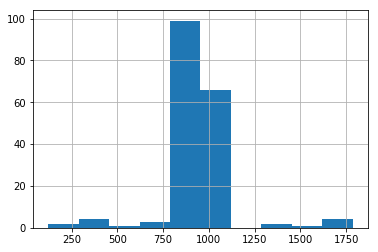

In [107]:
# plot distribution with histogram
ax = Plos_one["COST"].hist()
Plos_one["COST"].describe()

In [108]:
Biochem = df[df["Journaltitle"].isin(["Journal of biological chemistry"])]
Biochem.head()

,PMID/PMCID,Publisher,Journaltitle,Articletitle,COST
16,22610094,AMBSB,Journal of biological chemistry,Annexin-1 interaction with FPR2/ALX,265.67
60,PMC3576085,American Soc for Biochemistry and Molecular Bi...,Journal of biological chemistry,Understanding how noncatalytic carbohydrate bi...,1100.00
61,23239883 PMC3561570,American Society for Biochemistry and Molecula...,Journal of biological chemistry,Molecular architecture and functional analysis...,2259.64
64,PMCID: PMC3642348,American Society for Biochemistry and Molecula...,Journal of biological chemistry,Human and viral golgi anti-apoptotic protein (...,1019.71
65,PMID: 22992744 PMC3493908,American Society for Biochemistry and Molecula...,Journal of biological chemistry,Dynamic exchange of myosin VI on endocytic str...,1119.61


,COST
count,52.000000
mean,1423.588462
std,411.954360
min,265.670000
25%,1152.190000
50%,1301.140000
75%,1609.822500
max,2501.070000


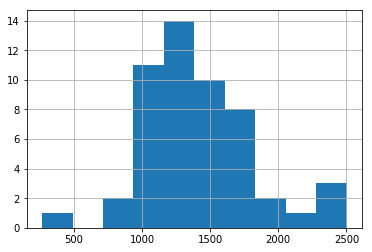

In [106]:
ax = Biochem["COST"].hist()
Biochem.describe()

In [85]:
# Explore outliers to see assess if they need deleting
#(Biochem["COST"] == 1580.47).sum()

In [91]:
Neuro = df[df["Journaltitle"].isin(["Neuroimage"])]
Neuro.head()

,PMID/PMCID,Publisher,Journaltitle,Articletitle,COST
437,23672768,Elseveier Science,Neuroimage,Gearing up for action: attentive tracking dyna...,1758.89
438,23046981,Elseveier Science,Neuroimage,Good practice for conducting and reporting MEG...,2345.00
689,PMC3734349\n,Elsevier,Neuroimage,Connectivity-based neurofeedback: dynamic caus...,1747.16
690,PMC3734350\n,Elsevier,Neuroimage,The impact of distractor congruency on stimulu...,1760.94
691,PMC3734351\n,Elsevier,Neuroimage,Distinct encoding of risk and value in economi...,1762.69


count      29.000000
mean     2215.168276
std       266.653947
min      1747.160000
25%      2100.540000
50%      2326.430000
75%      2396.570000
max      2503.340000
Name: COST, dtype: float64

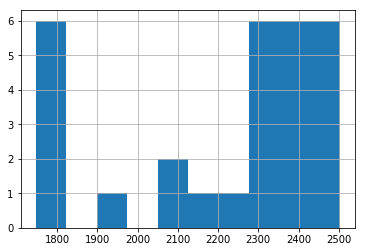

In [105]:
ax = Neuro["COST"].hist()
Neuro["COST"].describe()

In [94]:
Patho = df[df["Journaltitle"].isin(["Plos pathogens"])]
Patho.head()

,PMID/PMCID,Publisher,Journaltitle,Articletitle,COST
1300,PMC3597521,PLOS,Plos pathogens,Th2 Cell-intrinsic Hypo-responsiveness determi...,1343.73
1301,PMC3798605,PLOS,Plos pathogens,Independent pathways can transduce the life-cy...,1438.45
1583,PMCID:\n PMC3486875\n,Public Library of Science,Plos pathogens,Histone H1 plays a role in heterochromatin for...,1254.02
1584,23326235,Public Library of Science,Plos pathogens,"Schmallenberg virus pathogenesis, tropism and ...",1397.00
1585,21483485,Public Library of Science,Plos pathogens,Lung adenocarcinoma originates from retrovirus...,1404.00


count      22.000000
mean     1572.866818
std       161.780891
min      1254.020000
25%      1440.000000
50%      1600.250000
75%      1732.190000
max      1784.650000
Name: COST, dtype: float64

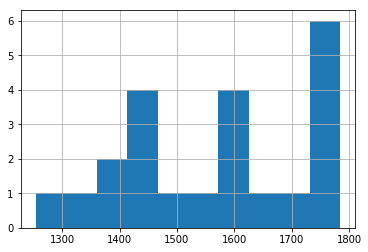

In [104]:
ax = Patho["COST"].hist()
Patho["COST"].describe()

In [95]:
PlosGen = df[df["Journaltitle"].isin(["Plos genetics"])]
PlosGen.head()

,PMID/PMCID,Publisher,Journaltitle,Articletitle,COST
1279,PMC3681601,PLoS,Plos genetics,Meiosis-specific stable binding of Augmin to a...,1494.42
1280,3715439,Plos,Plos genetics,Strabismus promotes recruitment and degradatio...,1761.48
1302,PMCID:PMC3715547),PLoS (Public Library of Science),Plos genetics,Trans-ancestral Studies Fine Map the SLE-Susce...,1774.83
1306,PMC3527205,PLoS Public Library of Science,Plos genetics,Genes contributing to pain sensitivity in the ...,1676.06
1368,PMC3521700,Public Library of Science,Plos genetics,A genome-wide RNAi screen reveals MAP kinase p...,1394.05


count      22.000000
mean     1643.110909
std       153.366825
min      1394.050000
25%      1465.747500
50%      1712.730000
75%      1770.195000
max      1809.510000
Name: COST, dtype: float64

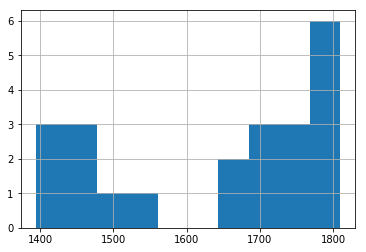

In [103]:
ax = PlosGen["COST"].hist()
PlosGen["COST"].describe()